In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.learning_curve import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
X, y = digits.data, digits.target

In [4]:
training_score, validation_scores = \
validation_curve(RandomForestClassifier(n_estimators=50, n_jobs=-1),X ,y,\
                 param_name="max_depth", param_range=range(1,10), cv=5)

In [5]:
training_score.shape

(9, 5)

In [12]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,\
                    train_scores_mean+train_scores_std, alpha=0.1, color='r')
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,\
                    validation_scores_mean+validation_scores_std, alpha=0.1, color='g')
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r", label="training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g", label="cross validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")

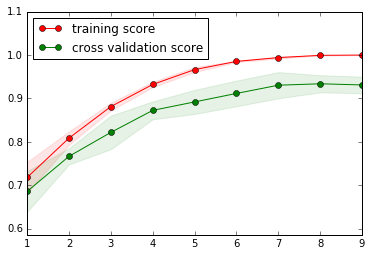

In [13]:
plot_validation_curve(range(1,10), training_score, validation_scores);

In [16]:
from sklearn.svm import LinearSVC
Cs = [0.00001,0.0001,0.001,0.01,0.1,1,10]
training_scores, validation_scores = \
validation_curve(LinearSVC(),X ,y,\
                 param_name="C", param_range=Cs)

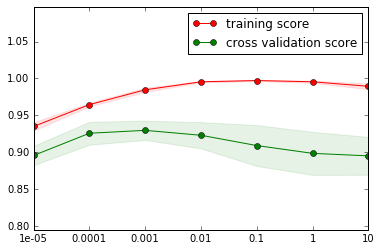

In [19]:
plot_validation_curve(range(7), training_scores, validation_scores)
plt.xticks(range(7), Cs);